The function loads the "loan_payments.csv" database from the local computer.

df_raw calls the function which returns the locally stored database in a table format.

In [1]:
import pandas as pd

def load_data():
    raw_data = pd.read_csv("C:/Users/eveli/ai_core/EDA/loan_payments.csv")
    return raw_data

df_raw = load_data()

The class DataTransform is created to change the data types of columns that are considered having a wrong data type assigned.

In [2]:
class DataTransform:
    
    def __init__(self, df_raw):
        self.df_raw = df_raw
        
    def float_to_int(self):
        self.df_raw.funded_amount_inv = self.df_raw["funded_amount_inv"].astype("int64")
        self.df_raw.annual_inc = self.df_raw["annual_inc"].astype("int64")
        
    def object_to_datetime(self):
        self.df_raw.issue_date = pd.to_datetime(self.df_raw.issue_date)
        self.df_raw.earliest_credit_line = pd.to_datetime(self.df_raw.earliest_credit_line)
        self.df_raw.last_payment_date = pd.to_datetime(self.df_raw.last_payment_date)
        self.df_raw.next_payment_date = pd.to_datetime(self.df_raw.next_payment_date)
        self.df_raw.last_credit_pull_date = pd.to_datetime(self.df_raw.last_credit_pull_date)
        
    def organise_values(self):
        self.df_raw["verification_status"].replace({"Source Verified": "Verified"}, inplace=True)
        self.df_raw["total_rec_late_fee"] = df_raw["total_rec_late_fee"].apply(lambda x:round(x,2))
        self.df_raw["collection_recovery_fee"] = df_raw["collection_recovery_fee"].apply(lambda x:round(x,2))
        
transform = DataTransform(df_raw)

int_dtype = transform.float_to_int()

datetime_dtype = transform.object_to_datetime()

org_dtype = transform.organise_values()

df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   54231 non-null  int64         
 1   id                           54231 non-null  int64         
 2   member_id                    54231 non-null  int64         
 3   loan_amount                  54231 non-null  int64         
 4   funded_amount                51224 non-null  float64       
 5   funded_amount_inv            54231 non-null  int64         
 6   term                         49459 non-null  object        
 7   int_rate                     49062 non-null  float64       
 8   instalment                   54231 non-null  float64       
 9   grade                        54231 non-null  object        
 10  sub_grade                    54231 non-null  object        
 11  employment_length            52113 non-nu

C:\Users\eveli\AppData\Local\Temp\ipykernel_7884\429545506.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df_raw.issue_date = pd.to_datetime(self.df_raw.issue_date)
C:\Users\eveli\AppData\Local\Temp\ipykernel_7884\429545506.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df_raw.earliest_credit_line = pd.to_datetime(self.df_raw.earliest_credit_line)
C:\Users\eveli\AppData\Local\Temp\ipykernel_7884\429545506.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df_raw.last_payment_date = pd.to_datetime(self.df_raw.last_payment_date)
C:\Users\eveli\App

The class DataFrameInfo is created to extract useful information about the dataframe (such as percentage of null values in each column, showing columns current data types, general statistics of each column etc.)

In [ ]:
class DataFrameInfo:
    
    def __init__(self, df_raw):
        self.df_raw = df_raw
        
    def show_colm_dtypes(self):
        self.df_raw.info()
        
    def show_colm_stat_values(self):
        print(self.df_raw.describe())
        
    def show_categ_colm_values_count(self):
        print(self.df_raw["term"].value_counts(), "\n")
        print(self.df_raw["grade"].value_counts(), "\n")
        print(self.df_raw["sub_grade"].value_counts(), "\n")
        print(self.df_raw["employment_length"].value_counts(), "\n")
        print(self.df_raw["home_ownership"].value_counts(), "\n")
        print(self.df_raw["verification_status"].value_counts(), "\n")
        print(self.df_raw["loan_status"].value_counts(), "\n")
        print(self.df_raw["payment_plan"].value_counts(), "\n")
        print(self.df_raw["purpose"].value_counts(), "\n")
        print(self.df_raw["policy_code"].value_counts(), "\n")
        print(self.df_raw["application_type"].value_counts(), "\n")
        
    def show_df_shape(self):
        print(self.df_raw.shape, "\n")
        
    def show_null_percentage(self):
        print(self.df_raw.isnull().sum()/len(self.df_raw))
        
info = DataFrameInfo(df_raw)

colm_dtype = info.show_colm_dtypes()

colm_stats = info.show_colm_stat_values() #somehow doesn't show anything unless i write "print" 

value_count = info.show_categ_colm_values_count() 

df_shape = info.show_df_shape()

null_percent = info.show_null_percentage()

class Plotter is created to visualise insights from the data (show percentage of null values in each column in a graph, test for normal distribution and show it in a graph etc.)

Unnamed: 0                     0.000000
id                             0.000000
member_id                      0.000000
loan_amount                    0.000000
funded_amount                  0.055448
funded_amount_inv              0.000000
term                           0.087994
int_rate                       0.095314
instalment                     0.000000
grade                          0.000000
sub_grade                      0.000000
employment_length              0.039055
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_date                     0.000000
loan_status                    0.000000
payment_plan                   0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_credit_line           0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq         0.571666
mths_since_last_record         0.886025


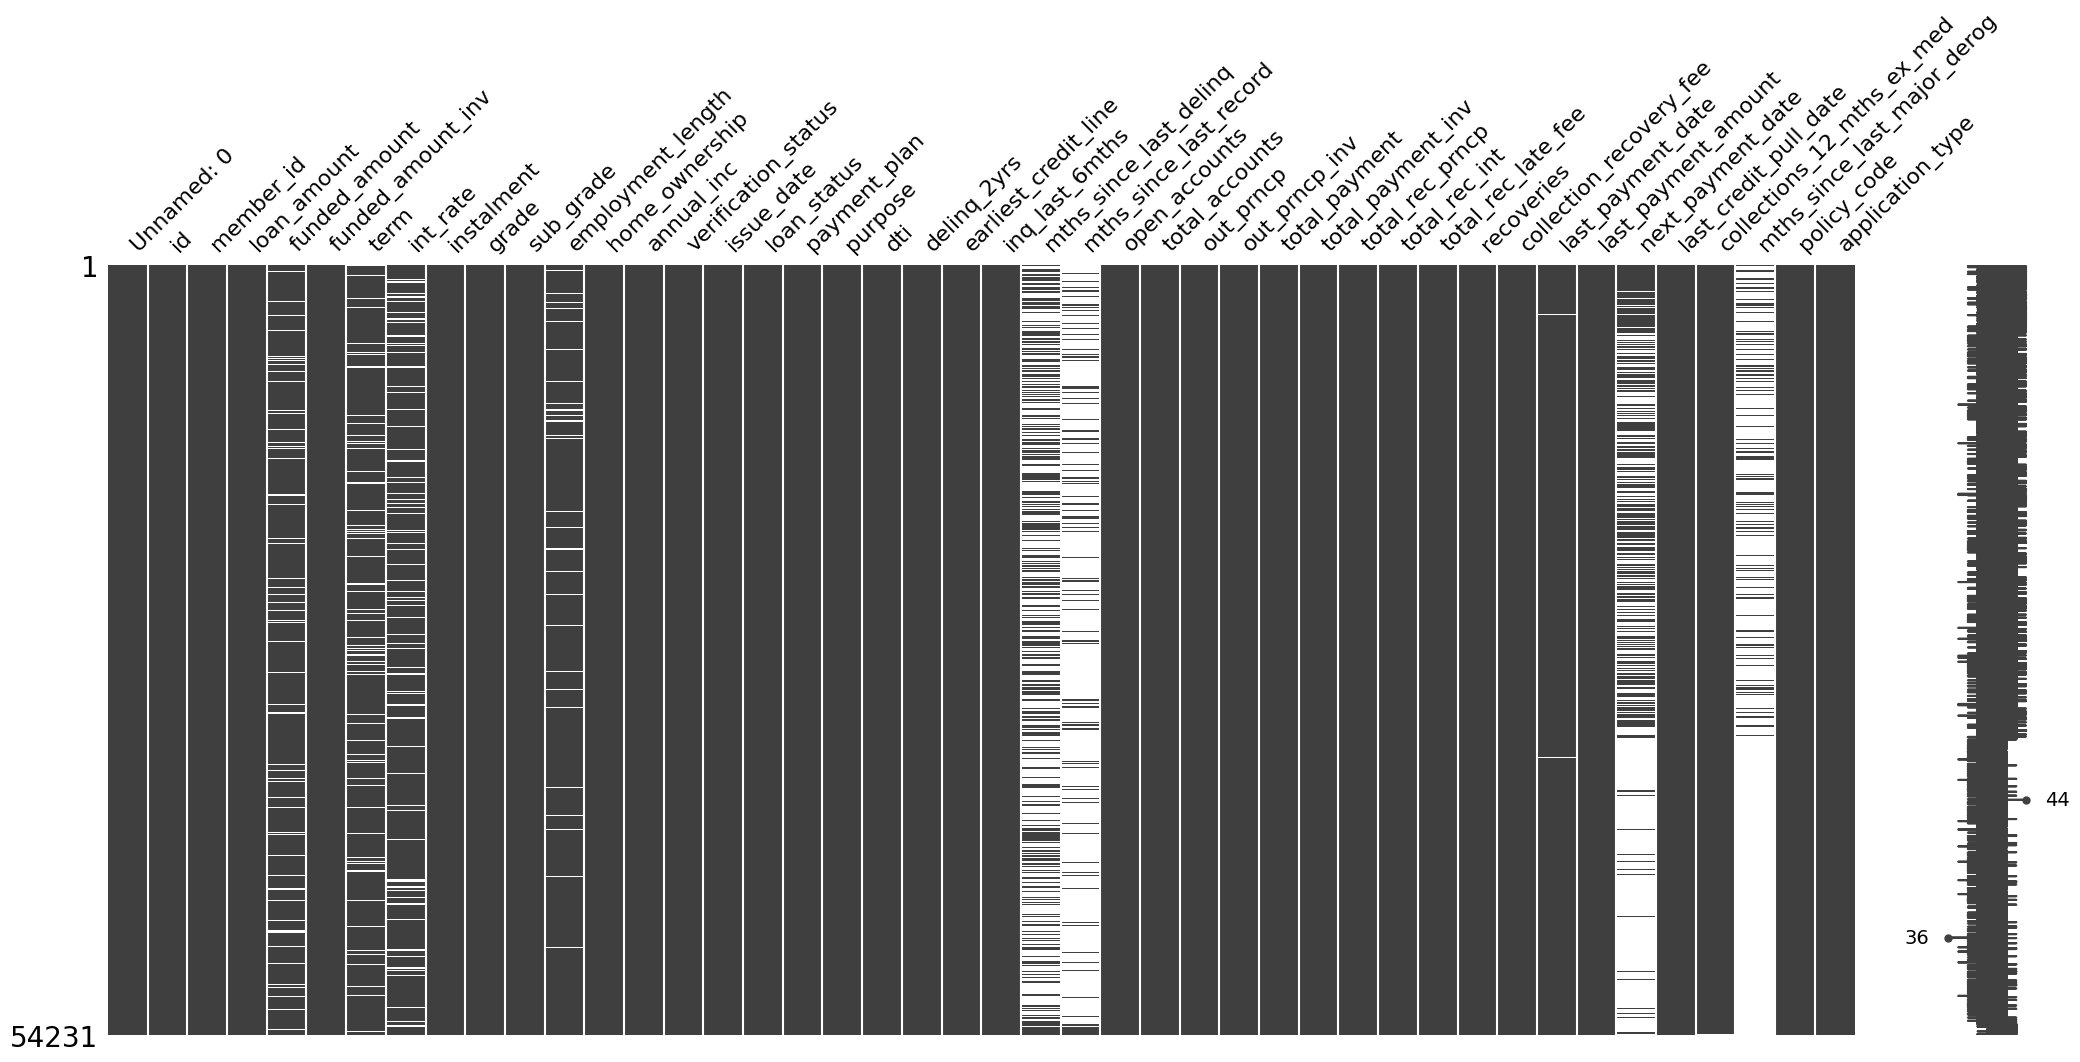

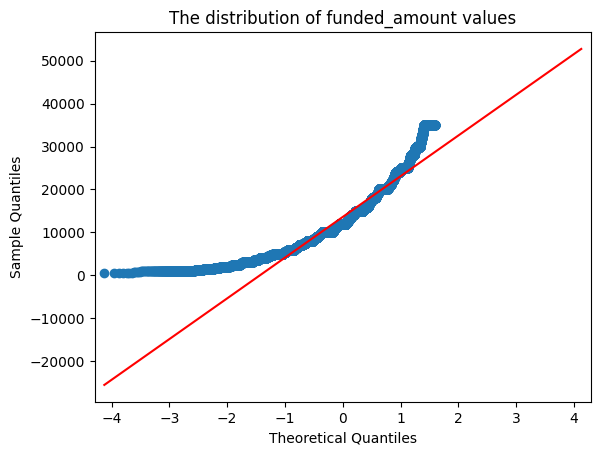


The median of funded_amount is 12000.0
The mean of funded_amount is 13229.50911682024
 Statistics=1421.934, p=0.000 



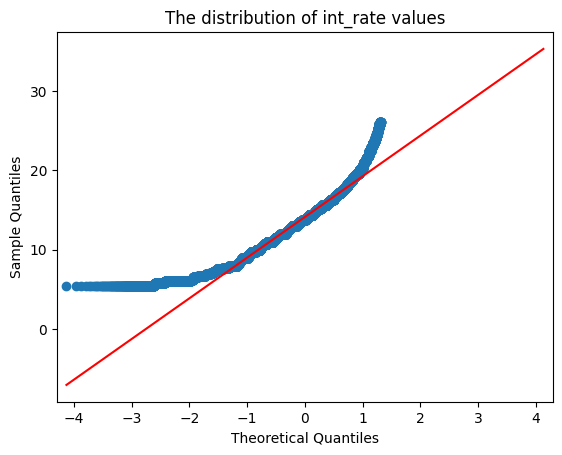


The median of int_rate is 13.16
The mean of int_rate is 13.507328482328484
 Statistics=118894.649, p=0.000 



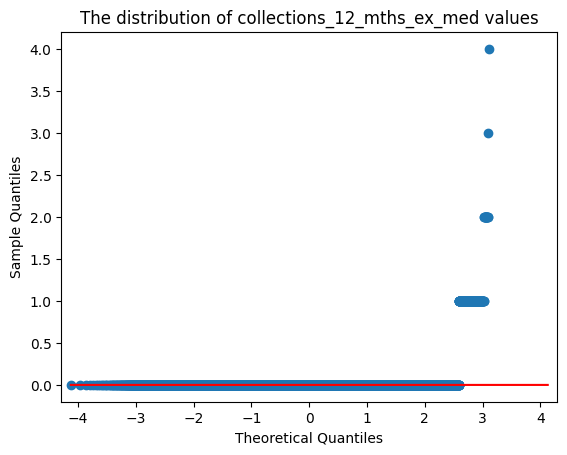


The median of collections_12_mths_ex_med is 0.0
The mean of collections_12_mths_ex_med is 0.004208194905869324


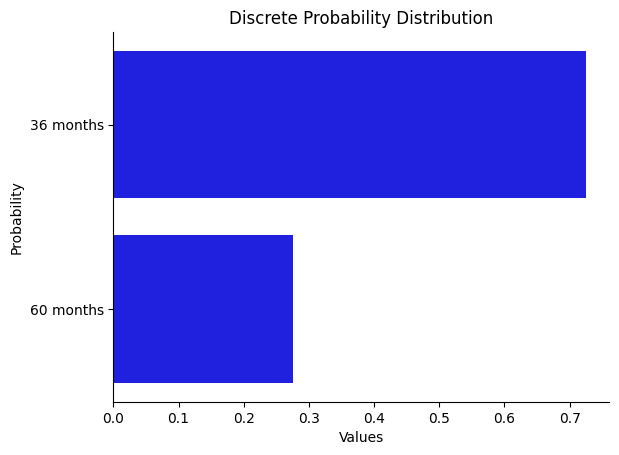


The value counts in  
term
36 months    35845
60 months    13614
Name: count, dtype: int64

The mode of term column is 36 months


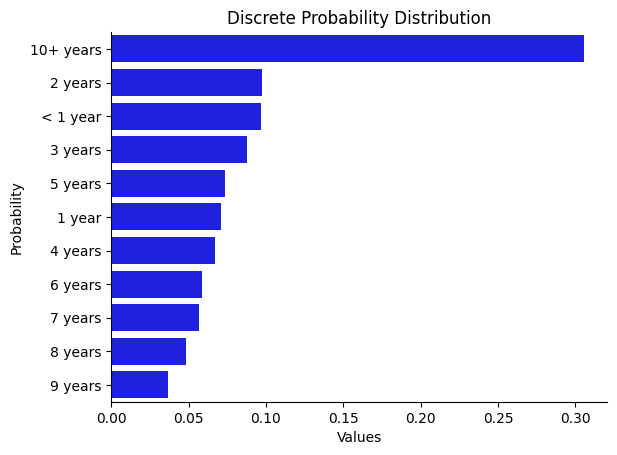


The value counts in  
employment_length
10+ years    15907
2 years       5066
< 1 year      5034
3 years       4589
5 years       3836
1 year        3708
4 years       3482
6 years       3059
7 years       2964
8 years       2537
9 years       1931
Name: count, dtype: int64

The mode of employment_length column is 10+ years


In [3]:
import seaborn as sns
import matplotlib.pyplot as plot
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
import missingno as msno

class Plotter:
    
    def __init__(self, df_raw):
        self.df_raw = df_raw
        
    def show_null_values(self):
        print(self.df_raw.isnull().sum()/len(self.df_raw), "\n")
        msno.matrix(self.df_raw) 
        
    def test_norm_distr_funded_amount(self):
        data = self.df_raw["funded_amount"]
        stat, p = normaltest(data, nan_policy='omit')
        print(" Statistics=%.3f, p=%.3f" % (stat, p), "\n")
        qq_plot = qqplot(self.df_raw["funded_amount"], scale=1, line='q')
        plot.title("The distribution of funded_amount values")
        plot.show()
        print(f'\nThe median of funded_amount is {df_raw["funded_amount"].median()}')
        print(f'The mean of funded_amount is {df_raw["funded_amount"].mean()}')
        
    def test_norm_distr_int_rate(self):
        data = self.df_raw["int_rate"]
        stat, p = normaltest(data, nan_policy='omit')
        print(" Statistics=%.3f, p=%.3f" % (stat, p), "\n")
        qq_plot = qqplot(self.df_raw["int_rate"], scale=1, line='q')
        plot.title("The distribution of int_rate values")
        plot.show()
        print(f'\nThe median of int_rate is {df_raw["int_rate"].median()}')
        print(f'The mean of int_rate is {df_raw["int_rate"].mean()}')
        
    def test_norm_distr_collections_12_mths_ex_med(self):
        data = self.df_raw["collections_12_mths_ex_med"]
        stat, p = normaltest(data, nan_policy='omit')
        print(" Statistics=%.3f, p=%.3f" % (stat, p), "\n")
        qq_plot = qqplot(self.df_raw["collections_12_mths_ex_med"], scale=1, line='q')
        plot.title("The distribution of collections_12_mths_ex_med values")
        plot.show()
        print(f'\nThe median of collections_12_mths_ex_med is {df_raw["collections_12_mths_ex_med"].median()}')
        print(f'The mean of collections_12_mths_ex_med is {df_raw["collections_12_mths_ex_med"].mean()}')
        
    def show_disc_prob_distr_term(self):
        plot.rc("axes.spines", top=False, right=False)
        probs = self.df_raw["term"].value_counts(normalize=True)
        dpd=sns.barplot(y=probs.index, x=probs.values, color='b')
        plot.xlabel("Values")
        plot.ylabel("Probability")
        plot.title("Discrete Probability Distribution")
        plot.show()
        print("\nThe value counts in  ")
        print(self.df_raw["term"].value_counts())
        print(f'\nThe mode of term column is {self.df_raw["term"].mode()[0]}')
        
    def show_disc_prob_distr_employment_length(self):
        plot.rc("axes.spines", top=False, right=False)
        probs = self.df_raw["employment_length"].value_counts(normalize=True)
        dpd=sns.barplot(y=probs.index, x=probs.values, color='b')
        plot.xlabel("Values")
        plot.ylabel("Probability")
        plot.title("Discrete Probability Distribution")
        plot.show()
        print("\nThe value counts in  ")
        print(self.df_raw["employment_length"].value_counts())
        print(f'\nThe mode of employment_length column is {self.df_raw["employment_length"].mode()[0]}')
        
visuals = Plotter(df_raw)

null_values = visuals.show_null_values()

nd_funded_amount = visuals.test_norm_distr_funded_amount()

nd_int_rate = visuals.test_norm_distr_int_rate()

nd_collections_12_mths_ex_med = visuals.test_norm_distr_collections_12_mths_ex_med()

dpd_term = visuals.show_disc_prob_distr_term()

dpd_employment_length = visuals.show_disc_prob_distr_employment_length()

class DataFrameTransform is used deal with NA in columns in different ways (replacing them with median, removing columns, removing rows etc). In here the last two methods where I try to drop the rows containing NA (for "last_payment_date" and "last_credit_pull_date" columns) seem to be having issues. I get attribute error "AttributeError: 'NoneType' object has no attribute 'dropna'"

<class 'pandas.core.series.Series'>
RangeIndex: 54231 entries, 0 to 54230
Series name: funded_amount
Non-Null Count  Dtype  
--------------  -----  
54231 non-null  float64
dtypes: float64(1)
memory usage: 423.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 54231 entries, 0 to 54230
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
54231 non-null  float64
dtypes: float64(1)
memory usage: 423.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 54231 entries, 0 to 54230
Series name: collections_12_mths_ex_med
Non-Null Count  Dtype  
--------------  -----  
54231 non-null  float64
dtypes: float64(1)
memory usage: 423.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 54231 entries, 0 to 54230
Series name: term
Non-Null Count  Dtype 
--------------  ----- 
54231 non-null  object
dtypes: object(1)
memory usage: 423.8+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 54231 entries, 0 to 54230
Series name: employment_length
Non-Null Count  Dty

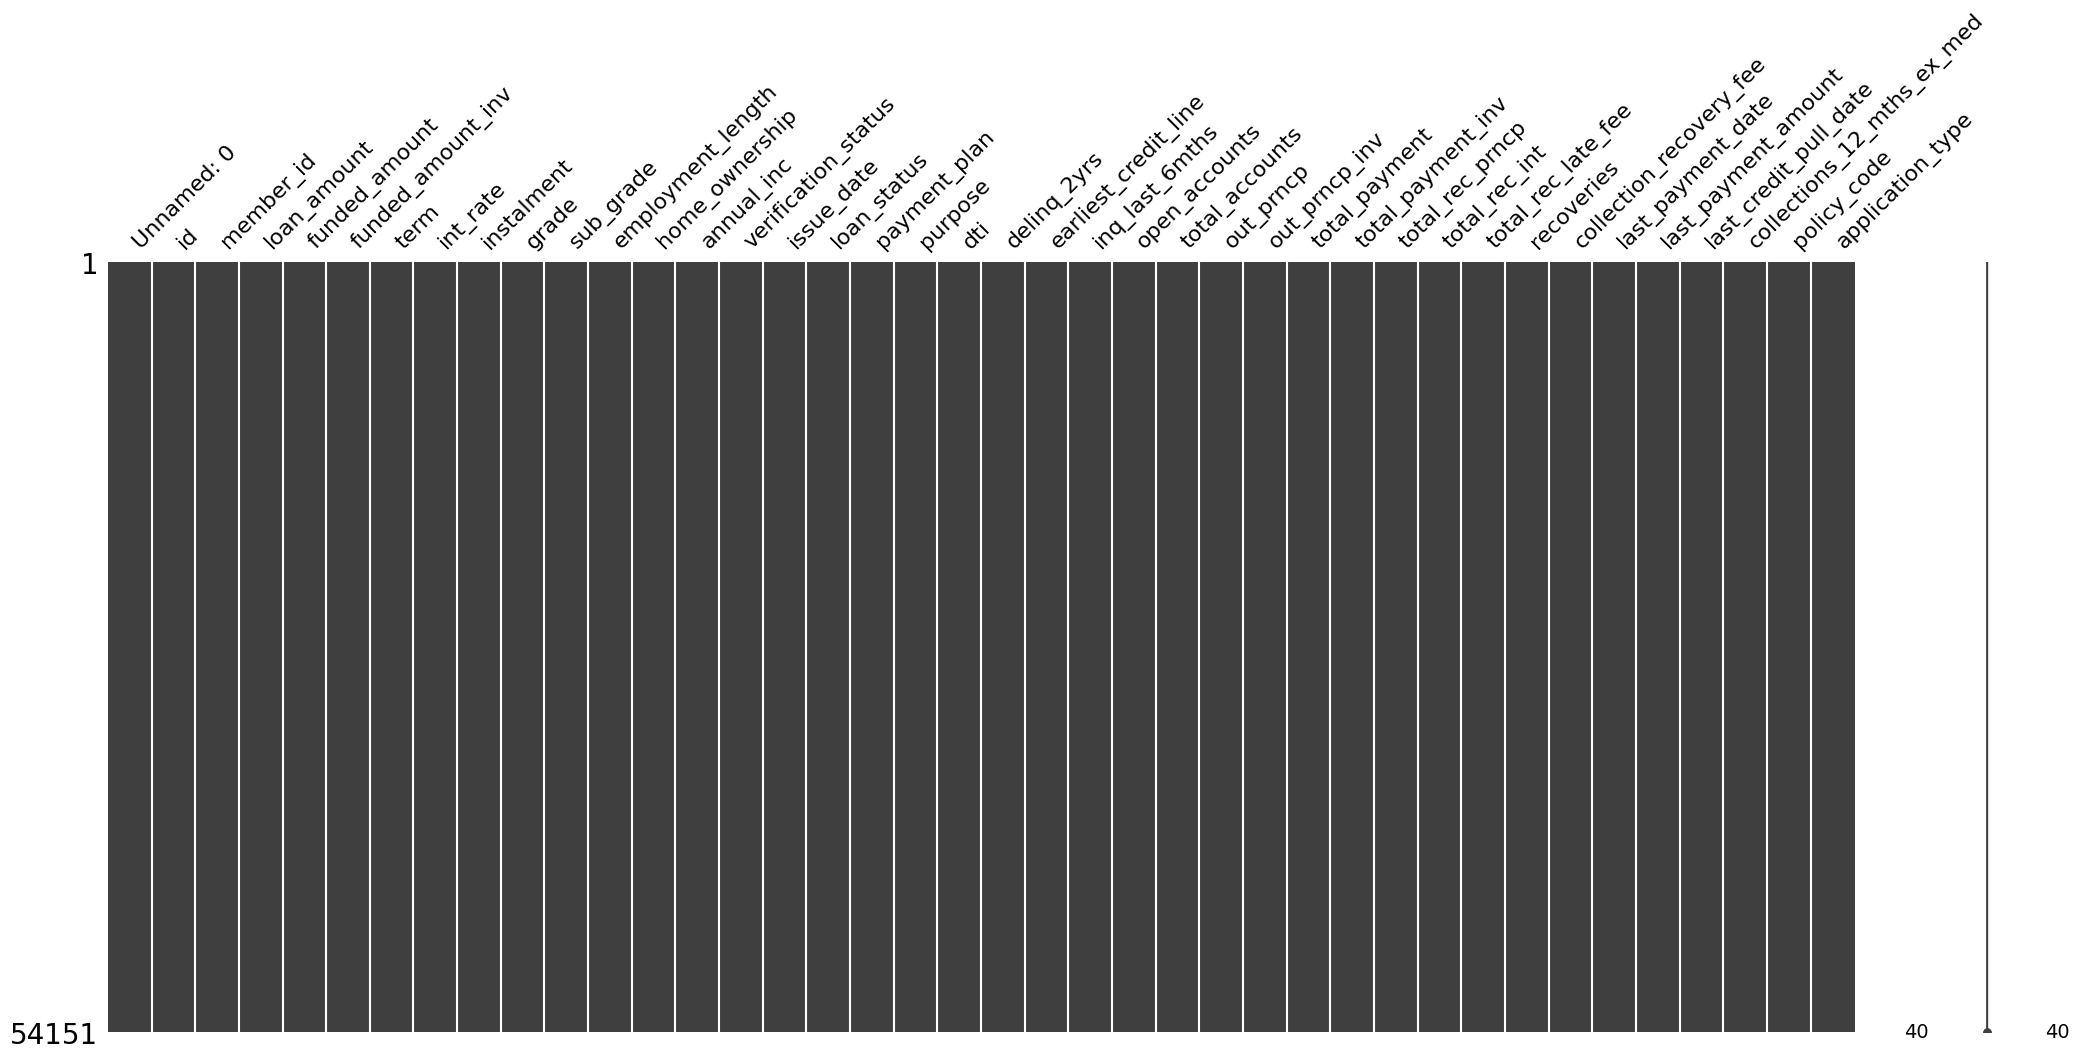

In [4]:
class DataFrameTransform:
    
    def __init__(self, df_raw):
        self.df_raw = df_raw
        
    def impute_funded_amount(self):
        self.df_raw["funded_amount"] = self.df_raw["funded_amount"].fillna(self.df_raw["funded_amount"].median())
        print(self.df_raw["funded_amount"].info())
        
    def impute_int_rate(self):
        self.df_raw["int_rate"] = self.df_raw["int_rate"].fillna(self.df_raw["int_rate"].median())
        print(self.df_raw["int_rate"].info())
        
    def impute_collections_12_mths_ex_med(self):
        self.df_raw["collections_12_mths_ex_med"] = self.df_raw["collections_12_mths_ex_med"].fillna(self.df_raw["collections_12_mths_ex_med"].median())
        print(self.df_raw["collections_12_mths_ex_med"].info())
        
    def impute_term(self):
        self.df_raw["term"] = self.df_raw["term"].fillna(self.df_raw["term"].mode()[0])
        print(self.df_raw["term"].info())
        
    def impute_employment_length(self):
        self.df_raw["employment_length"] = self.df_raw["employment_length"].fillna(self.df_raw["employment_length"].mode()[0])
        print(self.df_raw["employment_length"].info())
    
    def drop_rows_last_payment_date(self):
        self.df_raw.dropna(how="any", subset=["last_payment_date"], inplace=True)
        print(self.df_raw["last_payment_date"].info())
        
    def drop_rows_last_credit_pull_date(self):
        self.df_raw.dropna(how="any", subset=["last_credit_pull_date"], inplace=True)
        print(self.df_raw["last_credit_pull_date"].info())
        
    def drop_columns(self):
        self.df_raw = self.df_raw.drop(columns=["mths_since_last_delinq", "mths_since_last_record", "next_payment_date", "mths_since_last_major_derog"], inplace=True)
        
        
df_transform = DataFrameTransform(df_raw)

no_nan_funded_amount = df_transform.impute_funded_amount()

no_nan_int_rate = df_transform.impute_int_rate()

no_nan_coll_12_mths_ex_med = df_transform.impute_collections_12_mths_ex_med()

no_nan_term = df_transform.impute_term()

no_nan_employment_length = df_transform.impute_employment_length()

df_transform.drop_rows_last_payment_date()

df_transform.drop_rows_last_credit_pull_date()

no_columns = df_transform.drop_columns()



null_values = visuals.show_null_values()


Here is a rough work where I measured the skewness of every continuous column. This will eventually go into the class to make it more organised. 

In [ ]:
df_raw["loan_amount"].hist(bins=50)
print(f"Skew of loan_amount column is {df_raw['loan_amount'].skew()}") #skew: 0.804... moderate positive skew
print("This indicates a moderate positive skew.")

df_raw["funded_amount"].hist(bins=50)
print(f"Skew of funded_amount column is {df_raw['funded_amount'].skew()}") #skew: 0.869... moderate positive skew
print("This indicates a moderate positive skew")

df_raw["int_rate"].hist(bins=50)
print(f"Skew of int_rate column is {df_raw['int_rate'].skew()}") #skew: 0.456...distr is approx symmetric
print("This indicates that a distribution is approx. symmetric.")

df_raw["instalment"].hist(bins=50)
print(f"Skew of instalment column is {df_raw['instalment'].skew()}") #skew: 0.996...moderate positive skew
print("This indicates a moderate positive skew.")

df_raw["annual_inc"].hist(bins=50)
print(f"Skew of annual_inc column is {df_raw['annual_inc'].skew()}") #skew: 8.71...strong positive skew
print("This indicates a strong positive skew.")

df_raw["dti"].hist(bins=50)
print(f"Skew of dti column is {df_raw['dti'].skew()}") #skew: 0.189...distr is approx.symmetric
print("This indicates that a distribution is approx. symmetric.")

df_raw["delinq_2yrs"].hist(bins=50)
print(f"Skew of delinq_2yrs column is {df_raw['delinq_2yrs'].skew()}") #skew: 5.37...strong positive skew
print("This indicates a strong positive skew.")

df_raw["inq_last_6mths"].hist(bins=50)
print(f"Skew of inq_last_6mths column is {df_raw['inq_last_6mths'].skew()}") #skew: 3.25...strong positive skew
print("This indicates a strong positive skew.")

df_raw["open_accounts"].hist(bins=50)
print(f"Skew of open_accounts column is {df_raw['open_accounts'].skew()}") #skew: 1.059...strong positive skew
print("This indicates a strong positive skew.")

df_raw["total_accounts"].hist(bins=50)
print(f"Skew of total_accounts column is {df_raw['total_accounts'].skew()}") #skew: 0.78...moderate positive skew
print("This indicates a moderate positive skew.")

df_raw["out_prncp"].hist(bins=50)
print(f"Skew of out_prncp column is {df_raw['out_prncp'].skew()}") #skew: 2.35..strong positive skew
print("This indicates a strong positive skew.")

df_raw["out_prncp_inv"].hist(bins=50)
print(f"Skew of out_prncp_inv column is {df_raw['out_prncp_inv'].skew()}") #skew: 2.354... strong positive skew
print("This indicates a strong positive skew.")

df_raw["total_payment"].hist(bins=50)
print(f"Skew of total_payment column is {df_raw['total_payment'].skew()}") #skew: 1.269..strong positive skew
print("This indicates a strong positive skew.")

df_raw["total_rec_prncp"].hist(bins=50)
print(f"Skew of total_rec_prncp column is {df_raw['total_rec_prncp'].skew()}") #skew: 1.2626...strong positive skew
print("This indicates a strong positive skew.")

Here is my first attempt to correct the skew in a column which was not too satisfying it corrected the skew too much (making the skewness from moderatively positive to moderatively negative).

In [ ]:
import numpy as np 
import seaborn as sns 

log_funded_amount = df_raw["funded_amount"].map(lambda i: np.log(i) if i>0 else 0)
t=sns.histplot(log_funded_amount,label="Skewness: %.2f"%(log_funded_amount.skew()))
t.legend() # how to temporary correct the skew. 

df_raw["funded_amount"] = df_raw["funded_amount"].map(lambda i: np.log(i) if i>0 else 0)
t=sns.histplot(df_raw["funded_amount"],label="Skewness: %.2f"%(df_raw["funded_amount"].skew()))
t.legend()  #how to permanently correct the skew

Here tried a different technique to correct the skewness of the data however it produced the error saying that my data has negative values which it does not as I have checked afterwards using (df_raw["funded_amount_inv"] < 0).any().any()  code. 

In [ ]:
from scipy import stats
boxcox_funded_amount_inv = df_raw["funded_amount_inv"]
boxcox_funded_amount_inv = stats.boxcox(boxcox_funded_amount_inv)
boxcox_funded_amount_inv = pd.Series(boxcox_funded_amount_inv[0])
t=sns.histplot(boxcox_funded_amount_inv, label="Skewness: %.2f"%(boxcox_funded_amount_inv.skew()))
t.legend()

In [ ]:
(df_raw["funded_amount_inv"] < 0).any().any()